<a href="https://colab.research.google.com/github/jeronimocabezuelo/actividad3RiPA/blob/main/ideasKnot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from copy import copy #Utilizadmos esta funcion para copiar las matrices
import numpy as np #para la gestion de los arrays 2d
import matplotlib.pyplot as plt #Para mostrar los nudos.
from operator import itemgetter
np.set_printoptions(threshold=np.inf,linewidth=np.inf)


In [2]:
def mod(a,n):
  aux = a%n
  if aux == 0:
    return n
  return aux

In [3]:
def rodeadoDeCeros(matrix):
  if not np.array_equal(matrix[0,:] , np.zeros(matrix.shape[1])):
    matrix = np.insert(matrix,0,0,axis=0)
  if not np.array_equal(matrix[-1,:], np.zeros(matrix.shape[1])):
    matrix = np.insert(matrix,matrix.shape[0],0,axis=0)
  if not np.array_equal(matrix[:,0] , np.zeros(matrix.shape[0])):
    matrix = np.insert(matrix,0,0,axis=1)
  if not np.array_equal(matrix[:,-1], np.zeros(matrix.shape[0])):
    matrix = np.insert(matrix,matrix.shape[1],0,axis=1)
  return matrix
def quitaBordesCeros(matrix):
  if np.array_equal(matrix[0,:] , np.zeros(matrix.shape[1])):
    matrix = matrix[1:,:]
  if np.array_equal(matrix[-1,:], np.zeros(matrix.shape[1])):
    matrix = matrix[:-1,:]
  if np.array_equal(matrix[:,0] , np.zeros(matrix.shape[0])):
    matrix = matrix[:,1:]
  if np.array_equal(matrix[:,-1] , np.zeros(matrix.shape[0])):
    matrix = matrix[:,:-1]
  return matrix

In [4]:
def existe(indice,matrix):
  return indice[0]>-1 and indice[1]>-1 and indice[0]< matrix.shape[0] and indice[1]< matrix.shape[1]

In [5]:
class ColaPrioridad:
  def __init__(self):
    self.cola = []
  def prioridades(self):
    return [elemento[0] for elemento in self.cola]
  def items(self):
    return [elemento[1] for elemento in self.cola]
  def put(self,prioridadPut,itemPut):
    if itemPut in self.items():
      index = self.items().index(itemPut)
      if self.prioridades()[index]>prioridadPut:
        self.cola[index] = (prioridadPut,itemPut)
    else:
      self.cola.append((prioridadPut,itemPut))
  def get(self):
    if not self.cola:
      return None
    mi = min(self.prioridades())
    index = self.prioridades().index(mi)
    return self.cola.pop(index)[1]
  def empty(self):
    return not self.cola
  def len(self):
    return len(self.cola)
CP = ColaPrioridad()
CP.put(3,"A")
CP.put(2,"B")
CP.put(2,"C")

print(CP.items())
print(CP.prioridades())
print(CP.get())
print(CP.empty())
print(CP.get())
print(CP.get())
print(CP.get())
print(CP.empty())

['A', 'B', 'C']
[3, 2, 2]
B
False
C
A
None
True


In [6]:
def distance(index1,index2):
  return abs(index2[0]-index1[0])+abs(index2[1]-index1[1])

In [7]:
def up(ind):
  return(ind[0]-1,ind[1])
def down(ind):
  return(ind[0]+1,ind[1])
def left(ind):
  return(ind[0],ind[1]-1)
def right(ind):
  return(ind[0],ind[1]+1)
def uDLF(i,ind):
  if i%4 == 0:
    return up(ind)
  elif i%4 == 1:
    return right(ind)
  elif i%4 == 2:
    return down(ind)
  else :
    return left(ind)

In [8]:
def esEsquinaDeCamino(matrix,ind):
  number = matrix[ind]
  for i in range(4):
    ind1 = uDLF(i,ind)
    ind2 = uDLF((i+1)%4,ind)
    if matrix[ind1] == number and matrix[ind2] == number:
      return True
  return False

In [9]:
ma = np.zeros((5,4),dtype=int)
ma[0,3] = 2
ma[4,1] = 2
ma[1,2] = -1
ma[1,1] = -1
ma[1,0] = -1
ma[3,2] = -1
ma[3,1] = 3
ma[3,3] = -1
print(ma)

class Nodo:
  def __init__(self,m,o,d,l):
    self.matrix = m
    self.origin = o
    self.destin = d
    self.lenght = l
  def sucesores(self,number):
    suc = []
    if not self.origin[0] == 0:
      if self.matrix[up(self.origin)] == 0:
        newMatrix = copy(self.matrix)
        newMatrix[up(self.origin)] = number
        suc.append(Nodo(newMatrix,up(self.origin),self.destin,self.lenght+1))
      if up(self.origin) == self.destin:
        suc.append(Nodo(self.matrix,up(self.origin),self.destin,self.lenght))
    if not self.origin[0] == self.matrix.shape[0]-1:
      if self.matrix[down(self.origin)] == 0:
        newMatrix = copy(self.matrix)
        newMatrix[down(self.origin)] = number
        suc.append(Nodo(newMatrix,down(self.origin),self.destin,self.lenght+1))
      if down(self.origin) == self.destin:
        suc.append(Nodo(self.matrix,down(self.origin),self.destin,self.lenght))
    if not self.origin[1] == 0:
      if self.matrix[left(self.origin)] == 0:
        newMatrix = copy(self.matrix)
        newMatrix[left(self.origin)] = number
        suc.append(Nodo(newMatrix,left(self.origin),self.destin,self.lenght+1))
      if left(self.origin) == self.destin:
        suc.append(Nodo(self.matrix,left(self.origin),self.destin,self.lenght))
    if not self.origin[1] == self.matrix.shape[1]-1:
      if self.matrix[right(self.origin)] == 0:
        newMatrix = copy(self.matrix)
        newMatrix[right(self.origin)] = number
        suc.append(Nodo(newMatrix,right(self.origin),self.destin,self.lenght+1))  
      if right(self.origin) == self.destin:
        suc.append(Nodo(self.matrix,right(self.origin),self.destin,self.lenght))  
    return suc

def indices(matrix,number):
  return [(indice[0],indice[1]) for indice in np.argwhere(matrix==number)]

def conecta(matrix,numberO,numberD,caminoOtherNumber=False,esquinas=False):
  #Encontrar el origen y el destino:
  #print(matrix)
  for origin in indices(matrix,numberO):
    if esquinas:
      if esEsquinaDeCamino(matrix,origin):
        continue
    #print("probando origen: ", origin)
    for destin in [indice for indice in indices(matrix,numberD) if indice != origin]:
      if esquinas:
        if esEsquinaDeCamino(matrix,destin):
          continue
      #print("probando destino: ", destin)
      visited = []
      colaAbierta = ColaPrioridad()
      colaAbierta.put(distance(origin,destin),Nodo(matrix,origin,destin,1))
      while not colaAbierta.empty():
        nodo = colaAbierta.get()
        for sucesor in nodo.sucesores(-9 if caminoOtherNumber else numberD):
          if not sucesor.origin in visited:
            d = distance(sucesor.origin,sucesor.destin)
            if d == 0:
              return sucesor.lenght,sucesor.matrix,origin,destin
            else:
              visited.append(sucesor.origin)
              colaAbierta.put(d,sucesor)
  return None,None,None,None

def distanciaCamino(matrix,numberO,numberD):
  long,mat,_,_ = conecta(matrix,numberO,numberD)
  return long
def conectados(matrix,numberO,numberD):
  long,mat,_,_ = conecta(matrix,numberO,numberD)
  return mat
def conectables(matrix,numberO,numberD):
  m = conectados(matrix,numberO,numberD)
  return type(m)!=type(None)

long,mat,org,des = conecta(ma,2,2,caminoOtherNumber=True)
print(mat)
print(long)
print(org)
print(des)
print(conectables(ma,2,2))

[[ 0  0  0  2]
 [-1 -1 -1  0]
 [ 0  0  0  0]
 [ 0  3 -1 -1]
 [ 0  2  0  0]]
[[ 0  0  0  2]
 [-1 -1 -1 -9]
 [-9 -9 -9 -9]
 [-9  3 -1 -1]
 [-9  2  0  0]]
8
(0, 3)
(4, 1)
True


In [10]:
def concat(matrix1,matrix2,axis=1):
  """Hace lo mismo que la funcion concatenate de numpy pero para dos matrices y tambien funciona si una de las matrices tiene shape (0,0)"""
  if matrix1.shape[axis] == 0:
    return matrix2
  if matrix2.shape[axis] == 0:
    return matrix1
  return np.concatenate((matrix1,matrix2),axis=axis)

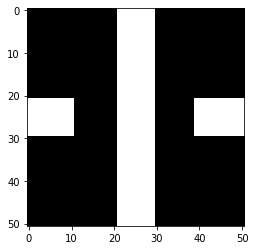

In [11]:
blank = np.zeros((51,51),dtype=float)
upDown = copy(blank)
upDown[:,21:30] = 1
leftRight = np.rot90(upDown)
upLeft = copy(blank)
upLeft[:30,21:30] = 1
upLeft[21:30,:30] = 1
downLeft = np.rot90(upLeft)
downRight = np.rot90(upLeft,k=2)
upRight = np.rot90(upLeft,k=3)
cross1 = copy(blank)
cross1[21:30,:] = 1
cross1[:11,21:30] = 1
cross1[39:,21:30] = 1
cross2 = np.rot90(cross1)
plt.imshow(cross2,cmap='gray')


In [12]:
def insert(array,obj,values,n=1,axis=1):
  for _ in range(n):
    array = np.insert(array,obj,values,axis=axis)
  return array

In [13]:
def creaHuecos(matrix):
  m2 = np.zeros((matrix.shape[0]*2-1,matrix.shape[1]),dtype=int)
  for i in range(matrix.shape[0]):
    m2[i*2,:] = matrix[i,:]
  m3 = np.zeros((m2.shape[0],m2.shape[1]*2-1),dtype=int)
  for i in range(m2.shape[1]):
    m3[:,i*2] = m2[:,i]
    m3copy = copy(m3)
  for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
      if m3copy[i,j]==0:
        if i>0 and i<m3.shape[0]-1:
          if m3[i-1,j]<0:
            m3[i,j] = m3[i+1,j]
            if not (m3[i+3,j] == m3[i,j] or m3[i+1,j+2] == m3[i,j] or m3[i+1,j-2] == m3[i,j]):
              m3[i+1,j] = 0
            continue
          elif m3[i+1,j]<0:
            m3[i,j] = m3[i-1,j]
            if not (m3[i-3,j] == m3[i,j] or m3[i-1,j+2] == m3[i,j] or m3[i-1,j-2] == m3[i,j]):
              m3[i-1,j] = 0
            continue
          elif m3[i-1,j] == m3[i+1,j] and m3[i+1,j]!=0:
            m3[i,j] = m3[i-1,j]
            continue
        if j>0 and j<m3.shape[1]-1:
          if m3[i,j-1]<0:
            m3[i,j] = m3[i,j+1]
            if not (m3[i,j+3] == m3[i,j] or m3[i+2,j+1] == m3[i,j] or m3[i-2,j+1] == m3[i,j]):
              m3[i,j+1] = 0
            continue
          elif m3[i,j+1]<0:
            m3[i,j] = m3[i,j-1]
            if not (m3[i,j-3] == m3[i,j] or m3[i+2,j-1] == m3[i,j] or m3[i-2,j-1] == m3[i,j]):
              m3[i,j-1] = 0
            continue
          elif m3[i,j-1] == m3[i,j+1] and m3[i,j+1]!=0:
            m3[i,j] = m3[i,j-1]
            continue
  return m3
#creaHuecos(m)

In [14]:
def direccion(k,pd,ind):
  """Devolvera 'L', 'R', 'U' o 'D' dependiendo de la direccion a la que vaya el hilo.
   Vamos a cambiar 'U' por 0, 'R' por 1, 'D' por 2 y 'L' por 3; de esta forma es mas facil hacer las rotaciones"""
  number = pd[ind]
  if number <=0:
    return None
  direcs = []
  visited = [ind]
  while True:
    if not up(ind) in visited:
      if existe(up(ind),pd):
        if pd[up(ind)] == number or pd[up(ind)] < 0:
          ind = up(ind)
          visited.append(ind)
          direcs.append(0)
          if pd[ind] < 0:          
            break
          else:
            continue
    if not right(ind) in visited:
      if existe(right(ind),pd):
        if pd[right(ind)] == number or pd[right(ind)] < 0:
          ind = right(ind)
          visited.append(ind)
          direcs.append(1)
          if pd[ind] < 0:
            break
          else:
            continue
    if not down(ind) in visited:
      if existe(down(ind),pd):
        if pd[down(ind)] == number or pd[down(ind)] < 0:
          ind = down(ind)
          visited.append(ind)
          direcs.append(2)
          if pd[ind] < 0:          
            break
          else:
            continue
    if not left(ind) in visited:
      if existe(left(ind),pd):
        if pd[left(ind)] == number or pd[left(ind)] < 0:
          ind = left(ind)
          visited.append(ind)
          direcs.append(3)
          if pd[ind] < 0:
            break
          else:
            continue
    break
  lastD = direcs[-1]
  firstD = direcs[0]
  lastInd = visited[-1]
  if number == 1:
    condition = pd[uDLF(lastD,lastInd)] == k.numberOfParts() 
  elif number == k.numberOfParts():
    condition = pd[uDLF(lastD,lastInd)] == k.numberOfParts()-1
  else:
    condition = pd[uDLF(lastD,lastInd)] < number
  if condition:
    return (firstD+2)%4
  return firstD

In [15]:
def recorreConDireccion(matrix,org,des,dir):
  """Recorre un camino de -9 siguiendo la direccion"""
  prevDirecion = None
  visited=[]
  while org != des:
    visited.append(org)
    if not up(org) in visited:
      if existe(up(org),matrix):
        if matrix[up(org)] == -9 or up(org) == des:
          org = up(org)
          if prevDirecion == 1:
            dir = (dir-1)%4
          elif prevDirecion == 3:
            dir = (dir+1)%4
          prevDirecion = 0
          continue
    if not down(org) in visited:
      if existe(down(org),matrix):
        if matrix[down(org)] == -9 or down(org) == des:
          org = down(org)
          if prevDirecion == 1:
            dir = (dir+1)%4
          elif prevDirecion == 3:
            dir = (dir-1)%4
          prevDirecion = 2
          continue
    if not left(org) in visited:
      if existe(left(org),matrix):
        if matrix[left(org)] == -9 or left(org) == des:
          org = left(org)
          if prevDirecion == 0:
            dir = (dir-1)%4
          elif prevDirecion == 2:
            dir = (dir+1)%4
          prevDirecion = 3
          continue
    if not right(org) in visited:
      if existe(right(org),matrix):
        if matrix[right(org)] == -9 or right(org) == des:
          org = right(org)
          if prevDirecion == 0:
            dir = (dir+1)%4
          elif prevDirecion == 2:
            dir = (dir-1)%4
          prevDirecion = 1
          continue       
  return visited,dir


In [26]:
class X:
  def __init__(self,x1,x2,x3,x4):
    self.parts = [x1,x2,x3,x4]
  def indexForPart(self,l):
    for i in range(len(self.parts)):
      if l == self.parts[i]:
        return i
    return None
  def __repr__(self):
    return self.parts.__repr__()
  def __eq__(self,obj):
    if type(self)!=type(obj):
      return False
    c1 = self.parts[0] == obj.parts[0] and self.parts[1] == obj.parts[1] and self.parts[2] == obj.parts[2] and self.parts[3] == obj.parts[3]
    c2 = self.parts[0] == obj.parts[2] and self.parts[1] == obj.parts[3] and self.parts[2] == obj.parts[0] and self.parts[3] == obj.parts[1]
    return c1 or c2 
class Knot:
  def __init__(self,xs):
    self.cross = xs
    self.pd = None
    self.isCrossValid()
  def __repr__(self):
    return "Cross: "+self.cross.__repr__()+"\nPlanar Diagrams:\n"+np.array2string(self.planarDiagrams(), suppress_small=True)
  def numberOfParts(self):
    allPart = set()
    for cros in self.cross:
      allPart.update(cros.parts)
    return len(allPart)
  def isCrossValid(self):
    (unique, counts) = np.unique([l for cros in self.cross for l in cros.parts], return_counts=True)
    for c in counts:
      if c!=2:
        print(self.cross)
        raise Exception("Knot bad genered. Number of parts.")
    if not all(unique == range(1,2*len(self.cross)+1)):
      raise Exception("Knot bad genered. Parts concordance.")

  def rotate(self,n=1):
    max_n = 2*len(self.cross)
    for i_c in range(len(self.cross)):
      for i_p in range(len(self.cross[i_c].parts)):
        self.cross[i_c].parts[i_p] = (self.cross[i_c].parts[i_p]+n) % max_n
        if self.cross[i_c].parts[i_p] == 0:
          self.cross[i_c].parts[i_p] = max_n
    self.isCrossValid()
    self.pd = None
  def inverse(self):
    max_n = 2*len(self.cross)
    for i_c in range(len(self.cross)):
      for i_p in range(len(self.cross[i_c].parts)):
        self.cross[i_c].parts[i_p] = max_n+1-self.cross[i_c].parts[i_p]
    self.isCrossValid()
    self.pd = None
  def planarDiagrams(self,debug=False):
    #Cuidado con el nudo sin ningún cruce
    if type(self.pd) != type(None):
      return self.pd
    n = 3

    cross_copy = self.cross.copy()
    cros = cross_copy.pop(crossWithPart(cross_copy,1))
    n_medio = n//2
    matrix = np.zeros((n,n),dtype=int)
    parts = cros.parts
    #La representacion de lo de enmedio sera -1 si pasa por arriba de izquierda a derecha y
    #                                        -2 si pasa por abajo  de izquierda a derecha
    matrix[n_medio,n_medio] = -2
    matrix[n_medio,n_medio-1] = parts[0]
    matrix[n_medio-1,n_medio] = parts[-1%4]
    matrix[n_medio,n_medio+1] = parts[-2%4]
    matrix[n_medio+1,n_medio] = parts[-3%4]
    cou = 0
    indice = (n_medio+1,n_medio) #filaColumna
    while cros != None and cou<100:
      cou+=1
      if debug:
        print("-------")
        print("indice",indice,matrix[indice])
        print(matrix)
        print("shape",matrix.shape)
        print("cross_copy",cross_copy)
        print("crossWithPart",crossWithPart(cross_copy,matrix[indice]))
      if crossWithPart(cross_copy,matrix[indice]) == None:
        if len(cross_copy) == 0:
          cros = None
        else:
          (unique, counts) = np.unique(matrix, return_counts=True)
          for i in range(0,len(unique)):
            if counts[i]<2 and unique[i]>0:
              aux = np.argwhere(matrix == unique[i])[0]
              indice = (aux[0],aux[1])
              if debug:
                print("Cambiamos el indice:",indice)
                print("Comprobamos que existe:")
              if indice[0]%n == n_medio-1:
                if debug:
                  print("Vamos hacia la arriba")
                if existe((indice[0]-n+1,indice[1]),matrix):
                  if matrix[(indice[0]-n+1,indice[1])] == 0:
                    break
                else:
                  break
              elif indice[0]%n == n_medio+1:
                if debug:
                  print("Vamos hacia la abajo")
                if existe((indice[0]+n-1,indice[1]),matrix):
                  if matrix[(indice[0]+n-1,indice[1])] == 0:
                    break
                else:
                  break
              elif indice[1]%n == n_medio-1:
                if debug:
                  print("Vamos hacia la izquierda")
                if existe((indice[0],indice[1]-n+1),matrix):
                  if matrix[(indice[0],indice[1]-n+1)] == 0:
                    break
                else:
                  break
              elif indice[1]%n == n_medio+1:
                if debug:
                  print("Vamos hacia la derecha")
                if existe((indice[0],indice[1]+n-1),matrix):
                  if matrix[(indice[0],indice[1]+n-1)] == 0:
                    break
                else:
                  break
      else:
        if indice[0] == n_medio-1:
          matrix = np.append(np.zeros((n,matrix.shape[1]),dtype=int),matrix,axis=0)
          indice = (n,indice[1])
          if debug:
            print("añadidas n filas hacia arriba")
          continue
        if indice[1] == n_medio-1:
          matrix = np.append(np.zeros((matrix.shape[0],n),dtype=int),matrix,axis=1)
          indice = (indice[0],n)
          if debug:
            print("añadidas n filas hacia izquierda")
          continue
        if indice[0] == matrix.shape[0]-n_medio:
          matrix = np.append(matrix,np.zeros((n,matrix.shape[1]),dtype=int),axis=0)
          if debug:
            print("añadidas n filas hacia abajo")
          continue
        if indice[1] == matrix.shape[1]-n_medio:
          matrix = np.append(matrix,np.zeros((matrix.shape[0],n),dtype=int),axis=1)
          if debug:
            print("añadidas n filas hacia derecha")
          continue
        cros = cross_copy.pop(crossWithPart(cross_copy,matrix[indice]))
        i = cros.indexForPart(matrix[indice])
        #comprobar la direccion:
        if debug:
          print("Añadiendo cruce: ",cros)
        if indice[0]%n == n_medio-1:
          if debug:
            print("Vamos hacia la arriba")
          if matrix[(indice[0]-n,indice[1])] != 0:
            if debug:
              print("Esta ocupado")
              print("Añadimos n filas en blanco")
            matrix = insert(matrix,n*(indice[0]//n),0,n,axis=0)
            indice = (indice[0]+n,indice[1])
          matrix[indice[0]-n+2,indice[1]]   = cros.parts[i]
          matrix[indice[0]-n+1,indice[1]-1] = cros.parts[(i-1)%4]
          matrix[indice[0]-n  ,indice[1]]   = cros.parts[(i-2)%4]
          matrix[indice[0]-n+1,indice[1]+1] = cros.parts[(i-3)%4]
          matrix[indice[0]-n+1,indice[1]]   = -1 if i%2==0 else -2
          indice = (indice[0]-n,indice[1])
        elif indice[0]%n == n_medio+1:
          if debug:
            print("Vamos hacia la abajo")
          if matrix[(indice[0]+n,indice[1])] != 0:
            if debug:
              print("Esta ocupado")
              print("Añadimos n filas en blanco")
            matrix = insert(matrix,n*((indice[0]//n)+1),0,n,axis=0)
          matrix[indice[0]+n-2,indice[1]]   = cros.parts[i]
          matrix[indice[0]+n-1,indice[1]+1] = cros.parts[(i-1)%4]
          matrix[indice[0]+n  ,indice[1]]   = cros.parts[(i-2)%4]
          matrix[indice[0]+n-1,indice[1]-1] = cros.parts[(i-3)%4]
          matrix[indice[0]+n-1,indice[1]]   = -1 if i%2==0 else -2
          indice = (indice[0]+n,indice[1])
        elif indice[1]%n == n_medio-1:
          if debug:
            print("Vamos hacia la izquierda")
          if matrix[(indice[0],indice[1]-n)] != 0:
            if debug:
              print("Esta ocupado")
              print("Añadimos n filas en blanco")
            matrix = insert(matrix,n*(indice[1]//n),0,n,axis=1)
            indice = (indice[0],indice[1]+n)
          matrix[indice[0]  ,indice[1]-n+2] = cros.parts[i]
          matrix[indice[0]+1,indice[1]-n+1] = cros.parts[(i-1)%4]
          matrix[indice[0]  ,indice[1]-n  ] = cros.parts[(i-2)%4]
          matrix[indice[0]-1,indice[1]-n+1] = cros.parts[(i-3)%4]
          matrix[indice[0]  ,indice[1]-n+1] = -2 if i%2==0 else -1
          indice = (indice[0],indice[1]-n)
        elif indice[1]%n == n_medio+1:
          if debug:
            print("Vamos hacia la derecha")
          if matrix[(indice[0],indice[1]+n)] != 0:
            if debug:
              print("Esta ocupado")
              print("Añadimos n filas en blanco")
            matrix = insert(matrix,n*((indice[1]//n)+1),0,n,axis=1)
          matrix[indice[0]  ,indice[1]+n-2] = cros.parts[i]
          matrix[indice[0]-1,indice[1]+n-1] = cros.parts[(i-1)%4]
          matrix[indice[0]  ,indice[1]+n  ] = cros.parts[(i-2)%4]
          matrix[indice[0]+1,indice[1]+n-1] = cros.parts[(i-3)%4]
          matrix[indice[0]  ,indice[1]+n-1] = -2 if i%2==0 else -1
          indice = (indice[0],indice[1]+n)
    cou = 0
    if debug:
      print("Fin")
      print(matrix)
    parts = [*range(1,2*len(self.cross)+1)]
    while parts:
      matrix = rodeadoDeCeros(matrix)
      tuples = [(part,distanciaCamino(matrix,part,part))for part in parts]
      distances = [leng for part,leng in tuples]
      if None in distances:
        if debug:
          print("Esto no deberia ocurrir")
        matrix = creaHuecos(matrix)
        continue
      tuples = sorted(tuples,key=itemgetter(1))
      parts = [part for part,leng in tuples]
      next = False
      for i in range(len(parts)):
        breaki = True
        part = parts[i]
        length,matrixConectados,_,_ = conecta(matrix,part,part)
        matrixConectados = rodeadoDeCeros(matrixConectados)
        for j in range(len(parts)):
          if j != i:
            part2 = parts[j]
            length2,matrixConectados2,_,_ = conecta(matrixConectados,part2,part2)
            if length2 == None:
              breaki = False
              break
        if breaki:
          break
        if i == len(parts)-1:
          if debug:
            print("estamos en el ultimo, hay que crear huecos")
          next = True
      if next:
        for i in range(len(parts)):
          breaki = True
          part = parts[i]
          length,matrixConectados,_,_ = conecta(matrix,part,part)
          matrixConectados = rodeadoDeCeros(matrixConectados)
          matrixConectados = creaHuecos(matrixConectados)
          for j in range(len(parts)):
            if j != i:
              part2 = parts[j]
              length2,matrixConectados2,_,_ = conecta(matrixConectados,part2,part2)
              if length2 == None:
                breaki = False
                break
          if breaki:
            break
      part = parts.pop(i)
      cou += 1
      matrix = matrixConectados
      if debug:
        print("------")
        print(matrix)
        print(parts)
    if type(matrix) != type(None):
      matrix = quitaBordesCeros(matrix)
      self.pd = matrix
      return matrix

    
  def image(self):
    matrix = self.planarDiagrams()
    matrix = rodeadoDeCeros(matrix)
    image = np.zeros((0,0),dtype=float)
    for r in range(0,matrix.shape[0]):
      imageRow = np.zeros((0,0),dtype=float)
      for c in range(0,matrix.shape[1]):
        if matrix[r,c] == -1:
          imageRow = concat(imageRow,cross1,axis=1)
        elif matrix[r,c] == -2:
          imageRow = concat(imageRow,cross2,axis=1)
        elif matrix[r,c] == 0:
          imageRow = concat(imageRow,blank,axis=1)
        else:
          number = matrix[r,c]
          left = number if matrix[r,c-1]<0 else matrix[r,c-1]
          up = number if matrix[r-1,c]<0 else matrix[r-1,c]
          right = number if matrix[r,c+1]<0 else matrix[r,c+1]
          down = number if matrix[r+1,c]<0 else matrix[r+1,c]
          if left == number and right == number:
            imageRow = concat(imageRow,leftRight,axis=1)
          elif up == number and down == number:
            imageRow = concat(imageRow,upDown,axis=1)
          elif up == number and right == number:
            imageRow = concat(imageRow,upRight,axis=1)
          elif up == number and left == number:
            imageRow = concat(imageRow,upLeft,axis=1)
          elif down == number and right == number:
            imageRow = concat(imageRow,downRight,axis=1)
          elif down == number and left == number:
            imageRow = concat(imageRow,downLeft,axis=1)
          else:
            imageRow = concat(imageRow,blank,axis=1)
      image = concat(image,imageRow,axis=0)
    return image

  def crateALoop(self,l,orientation):
    for i in range(len(self.cross)):
      parts_cros_copy = copy(self.cross[i].parts)
      for j in range(len(self.cross[i].parts)):
        if self.cross[i].parts[j]>l:
          self.cross[i].parts[j]+=2
        elif self.cross[i].parts[j] == l:
          if parts_cros_copy[(j+2)%4] == l+1:
            self.cross[i].parts[j]+=2
    if orientation:
      self.cross.append(X(l+1,l,l+2,l+1))
    else:
      self.cross.append(X(l,l+1,l+1,l+2))
    self.isCrossValid()
    self.pd = None

  def isPosibleUndoAloop(self,cros):
    (unique, counts) = np.unique(cros.parts, return_counts=True)
    return max(counts)>1
  def undoALoop(self,l):
    for i in range(len(self.cross)):
      if l in self.cross[i].parts:
        break
    if self.isPosibleUndoAloop(self.cross[i]):
      (unique, counts) = np.unique(self.cross[i].parts, return_counts=True)
      aux = np.argwhere(counts == 2)[0]
      l = unique[aux][0]
      last = False
      if 1 in self.cross[i].parts:
        last = True
      self.cross.remove(self.cross[i])
      m = 0
      for i in range(len(self.cross)):
        for j in range(len(self.cross[i].parts)):
          if self.cross[i].parts[j]>l:
            self.cross[i].parts[j]-=2
          m = max(m,self.cross[i].parts[j])
      if last:
        for i in range(len(self.cross)):
          for j in range(len(self.cross[i].parts)):
            if self.cross[i].parts[j]==m:
              self.cross[i].parts[j] = 1
    self.isCrossValid()
    self.pd = None

  def isPosibleCreateReidemaisterII(self,l1,l2):
    """Devolvera 0 si no es posible hacer el movimiento de Reidemaister, 
       devolvera 1 si tiene direcciones opuestas,"""
    if l2<=l1:
      return 0
    pd = self.planarDiagrams()
    pd = rodeadoDeCeros(pd)
    pd = creaHuecos(pd)
    _,pd2,org,des = conecta(pd,l1,l2,caminoOtherNumber=True,esquinas=True)
    if type(pd2)==type(None):
      return 0
    if distance(org,des) == 1:
      #print("distancia 1")
      if direccion(self,pd,org) != direccion(self,pd,des):
        return 1
      else:
        #Aqui tenemos que comprobar los otros dos casos
        return 2
    d1 = direccion(self,pd,org)
    d2 = direccion(self,pd,des)
    visited,dR = recorreConDireccion(pd2,org,des,d1)
    v1 = visited[1]
    u0 = up(visited[0])
    r0 = right(visited[0])
    d0 = down(visited[0])
    l0 = left(visited[0])
    if d2 != dR:
      if (d1==0 and v1==l0) or (d1==1 and v1==u0) or (d1==2 and v1==u0) or (d1==3 and v1==d0):
        return 4
      if (d1==0 and v1==r0) or (d1==1 and v1==d0) or (d1==2 and v1==l0) or (d1==3 and v1==u0):
        return 5
      raise Exception("No se deberia generar este error")
      
    else:
      #Aqui tenemos que comprobar los otros dos casos
      if (d1==0 and v1==r0) or (d1==1 and v1==d0) or (d1==2 and v1==l0) or (d1==3 and v1==u0):
        return 2
      if (d1==0 and v1==l0) or (d1==1 and v1==u0) or (d1==2 and v1==r0) or (d1==3 and v1==d0):
        return 3
      raise Exception("No se deberia generar este error")
  def createReidemaisterII(self,l1,l2,orientation):
    reidemaister = self.isPosibleCreateReidemaisterII(l1,l2)
    if reidemaister != 0:
      for c in range(len(self.cross)):
        cros_copy = copy(self.cross[c].parts)
        for p in range(len(self.cross[c].parts)):
          if self.cross[c].parts[p] == l1:
            if cros_copy[(p+2)%4] == l1+1:
              self.cross[c].parts[p] = self.cross[c].parts[p]+2
          elif self.cross[c].parts[p] > l1 and self.cross[c].parts[p] < l2:
            self.cross[c].parts[p] = self.cross[c].parts[p]+2
          elif self.cross[c].parts[p] == l2:
            if cros_copy[(p+2)%4] == l2-1:
              self.cross[c].parts[p] = self.cross[c].parts[p]+2
            else:
              self.cross[c].parts[p] = self.cross[c].parts[p]+4
          elif self.cross[c].parts[p]>l2:
            self.cross[c].parts[p] = self.cross[c].parts[p]+4
      if reidemaister == 2:
        #print("Tienen la misma direcion, tipo 2")
        if orientation:
          self.cross.append(X(l2+2,l1+1,l2+3,l1))
          self.cross.append(X(l2+3,l1+1,l2+4,l1+2))
        else:
          self.cross.append(X(l1,l2+2,l1+1,l2+3))
          self.cross.append(X(l1+1,l2+4,l1+2,l2+3))
      elif reidemaister == 3:
        #print("Tienen la misma direcion, tipo 3")
        if orientation:
          self.cross.append(X(l1  ,l2+3,l1+1,l2+2))
          self.cross.append(X(l1+1,l2+3,l1+2,l2+4))
        else:
          self.cross.append(X(l2+2,l1  ,l2+3,l1+1))
          self.cross.append(X(l2+3,l1+2,l2+4,l1+1))
      elif reidemaister == 4:
        #print("Tienen distinta direcion, tipo 4")
        if orientation:
          self.cross.append(X(l2+2,l1+1,l2+3,l1+2))
          self.cross.append(X(l2+3,l1+1,l2+4,l1))
        else:
          self.cross.append(X(l1+2,l2+2,l1+1,l2+3))
          self.cross.append(X(l1  ,l2+3,l1+1,l2+4))
      elif reidemaister == 5:
        #print("Tienen distinta direcion, tipo 5")
        if orientation:
          self.cross.append(X(l2+4,l1+1,l2+3,l1 ))
          self.cross.append(X(l2+3,l1+1,l2+2,l1+2))
        else:
          self.cross.append(X(l1  ,l2+4,l1+1,l2+3))
          self.cross.append(X(l1+1,l2+2,l1+2,l2+3))
      self.isCrossValid()
      self.pd = None
    else:
      print("No ha sido posible", reidemaister)
  def isPosibleUndoReidemaisterII(self,l1,l2):
    n = self.numberOfParts()
    x1 = X(    l1     ,    l2     ,mod(l1+1,n),mod(l2+1,n))
    x2 = X(    l1     ,mod(l2-1,n),mod(l1-1,n),    l2     )
    if x1 in self.cross and x2 in self.cross:
      return (x1,x2)
    x1 = X(    l2     ,mod(l1+1,n),mod(l2+1,n),    l1     )
    x2 = X(mod(l2-1,n),mod(l1-1,n),    l2     ,    l1     )
    if x1 in self.cross and x2 in self.cross:
      return (x1,x2)
    x1 = X(    l1     ,    l2     ,mod(l1+1,n),mod(l2-1,n))
    x2 = X(    l1     ,mod(l2+1,n),mod(l1-1,n),    l2     )
    if x1 in self.cross and x2 in self.cross:
      return (x1,x2)
    x1 = X(    l1     ,    l2     ,mod(l1-1,n),mod(l2+1,n))
    x2 = X(    l1     ,mod(l2-1,n),mod(l1+1,n),    l2     )
    if x1 in self.cross and x2 in self.cross:
      return (x1,x2)
    return None
  def undoReidemaisterII(self,l1,l2,debug=False):
    x1x2 = self.isPosibleUndoReidemaisterII(l1,l2)
    if type(x1x2) == type(None):
      x1x2 = self.isPosibleUndoReidemaisterII(l2,l1)
      if type(x1x2) == type(None):
        print("No se puede deshacer Reidemaister II",l1,l2)
        return
    n = self.numberOfParts()  
    lm = min(l1,l2)
    lM = max(l1,l2)
    (x1,x2) = x1x2
    if debug:
      print("Los cruces que quitamso son",x1,x2)
    self.cross.remove(x1)
    self.cross.remove(x2)
    for c in range(len(self.cross)):
      cros_copy = copy(self.cross[c].parts)
      for p in range(len(self.cross[c].parts)):
        part = cros_copy[p]
        if part >= lm+1 and part <= lM-1:
          self.cross[c].parts[p] = mod(part-2,n-4)
        elif part >= lM+1:
          self.cross[c].parts[p] = mod(part-4,n-4)
        if debug:
          print(part,"--",self.cross[c].parts[p])  
    self.isCrossValid()
    self.pd = None
def crossWithPart(cross,part):
  for i in range(len(cross)):
    if part in cross[i].parts:
      return i
  return None



Cross: [[4, 5, 5, 6], [2, 3, 3, 4], [6, 1, 1, 2]]
Planar Diagrams:
[[ 5  5  0  0  3  3]
 [ 5 -2  4  4 -1  3]
 [ 0  6  0  0  2  0]
 [ 0  6  0  0  2  0]
 [ 0  6  6  6 -2  1]
 [ 0  0  0  0  1  1]]


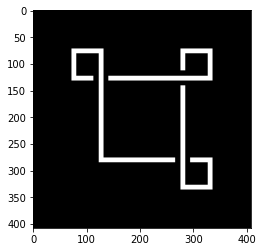

In [35]:
k = Knot([
  X(1,9,2,8),
  X(3,10,4,11), 
  X(5,3,6,2),
  X(7,1,8,12), 
  X(9,4,10,5), 
  X(11,7,12,6)])
#k = Knot([X(1,2,4,1),
#         X(2,3,3,4)])
#k = Knot([X(1,2,6,1),
#          X(4,5,5,6),
#          X(2,3,3,4)])
k = Knot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.crateALoop(2,False)
k.crateALoop(3,False)
k.crateALoop(2,False)
k.crateALoop(1,False)
k.crateALoop(2,False)
k.crateALoop(5,False)
k.crateALoop(7,False)


k.createReidemaisterII(4,16,True)
k.createReidemaisterII(18,24,False)
k.createReidemaisterII(1,9,False)
k.createReidemaisterII(12,22,False)
k.createReidemaisterII(15,17,False)
k.createReidemaisterII(20,34,False)

k.undoReidemaisterII(17,19)
k.undoReidemaisterII(7,31)
k.undoReidemaisterII(27,35)
k.undoReidemaisterII(15,27)
k.undoReidemaisterII(11,23)

k.undoALoop(12)

k.undoReidemaisterII(11,1)

k.undoALoop(6)
k.undoReidemaisterII(5,1)
k.undoALoop(3)
k.undoALoop(4)
k.undoALoop(7)
#k.undoALoop(1)
print(k)

image = k.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')




In [89]:
k.undoALoop(17)

print(k)

image = k.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')


IndexError: ignored

In [ ]:
#Reemplazar elementos de una matriz
matrix = np.zeros((7,8),dtype=int)
matrix[(1,2)] = 2
matrix[(1,3)] = 2
print(matrix)
np.place(matrix, matrix==2, 10)
print(matrix)

In [ ]:
def outline(im):
    ''' Input binary 2D (NxM) image. Ouput array (2xK) of K (y,x) coordinates
        where 0 <= K <= 2*M.
    '''
    topbottom = np.empty((1,2*im.shape[1]), dtype=np.uint16)
    topbottom[0,0:im.shape[1]] = np.argmax(im, axis=0)
    topbottom[0,im.shape[1]:] = (im.shape[0]-1)-np.argmax(np.flipud(im), axis=0)
    mask      = np.tile(np.any(im, axis=0), (2,))
    xvalues   = np.tile(np.arange(im.shape[1]), (1,2))
    return np.vstack([topbottom,xvalues])[:,mask].T


In [ ]:
matrix = np.zeros((7,8),dtype=int)
matrix[(1,2)] = 1
matrix[(1,3)] = 1
matrix[(1,4)] = 1
matrix[(1,5)] = 1
matrix[(2,2)] = 1
matrix[(3,2)] = 1
matrix[(3,3)] = 1
matrix[(3,4)] = 1
matrix[(3,5)] = 1
matrix[(3,6)] = 1
matrix[(3,7)] = 1
matrix[(2,7)] = 1
matrix[(1,7)] = 1
matrix[(0,7)] = 1
matrix[(0,6)] = 1

print(matrix)

In [ ]:
def isIn(matrix,index):
  for i in range(4):
    indexAux = index
    while True:
      indexAux = uDLF(i,indexAux)
      if not existe(indexAux,matrix):
        return False
      if matrix[indexAux] == 1:
        break
  return True
def innerContour(matrix):
  out = np.zeros(matrix.shape,dtype=int)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      index = (i,j)
      if isIn(matrix,index):
        out[index] = 1
  return out

In [ ]:
print(innerContour(matrix))